In [9]:
# Collect AuC and SID  and create correlation plot
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Collect data
subject_data = {}
for subject_id in subject_ids:
    subject_data[subject_id] = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    # Process each epidermal scan for SID, AUC, and inflection depth
    for derm_scan in subject_data[subject_id].visit.epidermal:
        derm_scan.get_normalize_a_scan()
        
        # Approach 1 and 2 to find the inflection point
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        
        # Get the inflection point depth
        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        
        # Get SID and AUC for the scan
        derm_scan.get_sid()
        derm_scan.get_AuC()

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

In [12]:
AuC = []
sid = []
inflection_depths = []

for subject_id in subject_data.keys():

    #Gather initial visit
    for scan in subject_data[subject_id].visit.epidermal:
        AuC.append(scan.AuC)
        sid.append(scan.sid)
        inflection_depths.append(scan.depth_data["Depth"][scan.min_location_index])

-0.5946757402851802 1.2869478142443485e-49


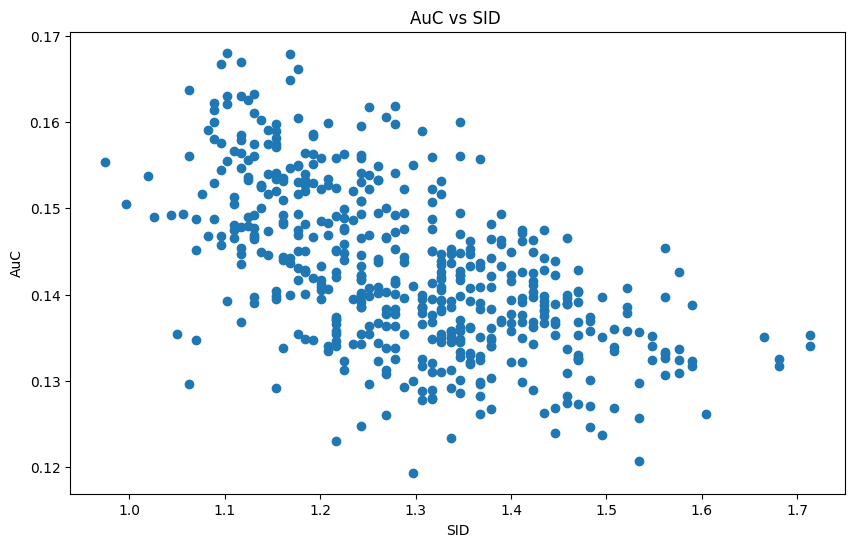

In [27]:
from scipy import stats
# Create a scatter plot of AuC vs SID

a = np.linspace(0, 1, len(AuC))
b = a*0.1 + np.random.random(len(a)) * 0.1 

plt.figure(figsize=(10, 6))
plt.scatter(sid, AuC)
# plt.scatter(a,b)
plt.title('AuC vs SID ')
plt.xlabel('SID')
plt.ylabel('AuC')

res = stats.spearmanr(sid, AuC)
print(res.statistic, res.pvalue)

-0.16083516023111297 0.0002845031248624626


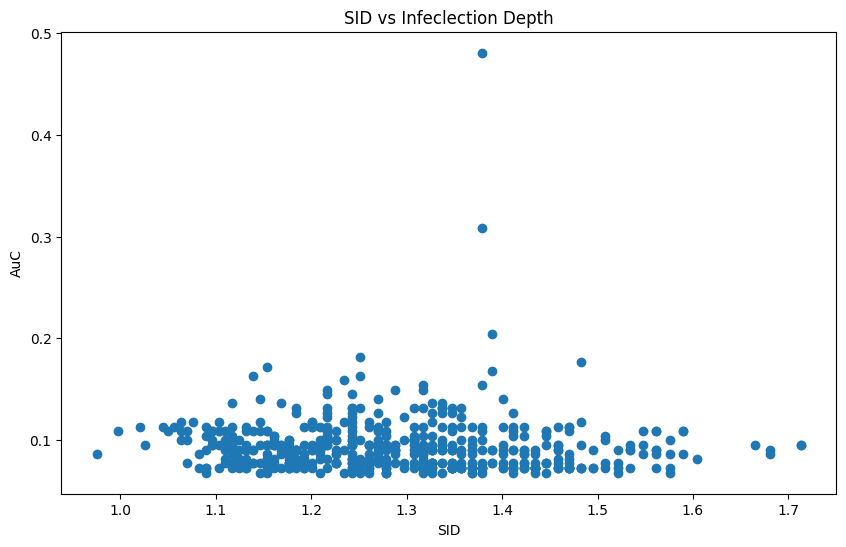

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(sid, inflection_depths)
# plt.scatter(a,b)
plt.title('SID vs Infeclection Depth')
plt.xlabel('SID')
plt.ylabel('AuC')

res = stats.spearmanr(sid, inflection_depths)
print(res.statistic, res.pvalue)

-0.23784273066460535 6.322843060160556e-08


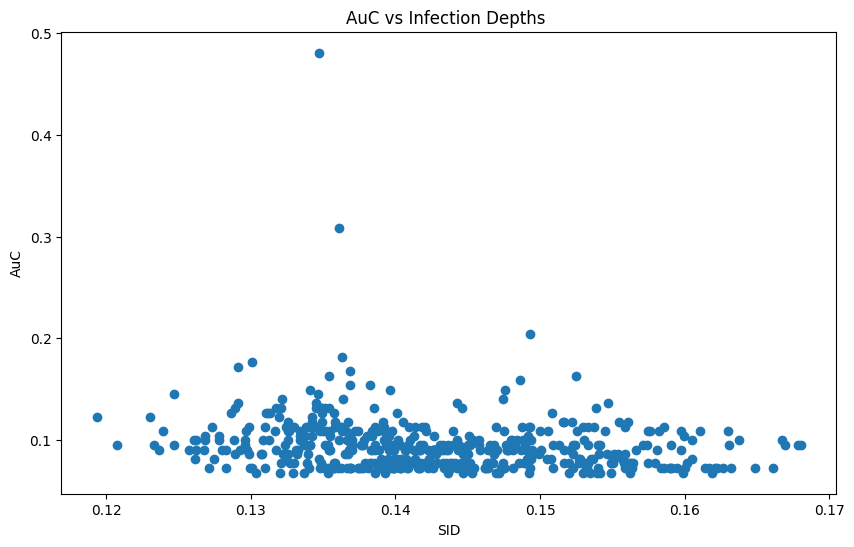

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(AuC, inflection_depths)
# plt.scatter(a,b)
plt.title('AuC vs Infection Depths ')
plt.xlabel('SID')
plt.ylabel('AuC')

res = stats.spearmanr(AuC, inflection_depths)
print(res.statistic, res.pvalue)

